In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv("../Documents/data_akbilgic.csv")
df = df.set_index("date")
df.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
5-Jan-09,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
6-Jan-09,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
7-Jan-09,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
8-Jan-09,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
9-Jan-09,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


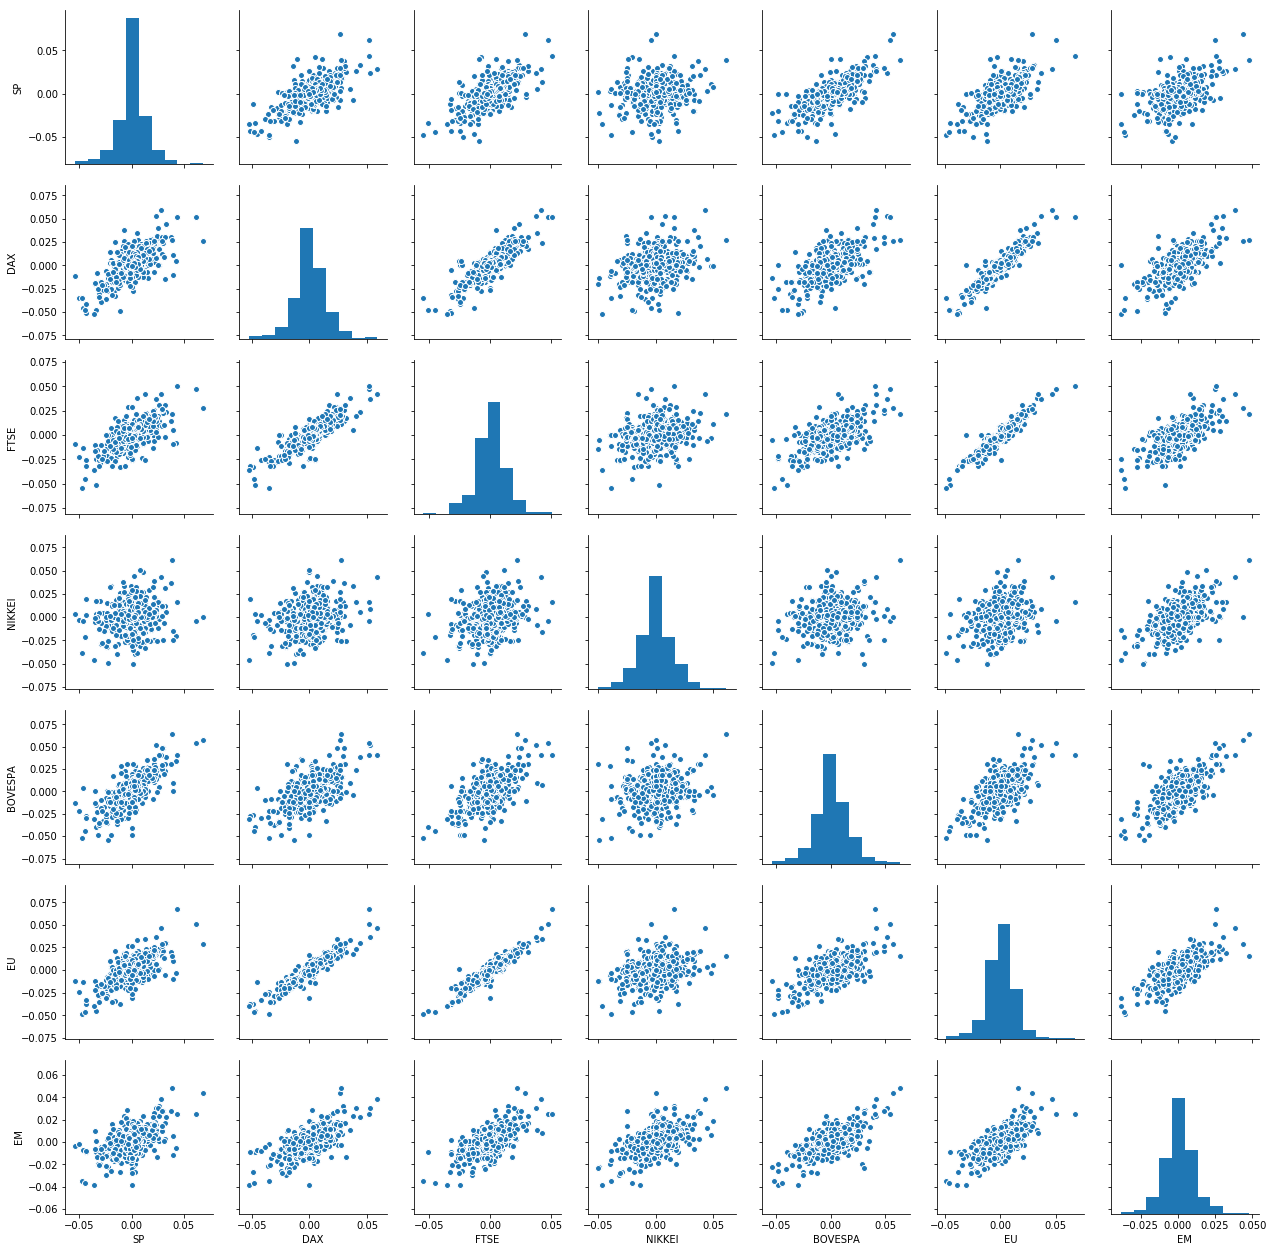

In [3]:
sns.pairplot(df.iloc[:, 1:])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 5-Jan-09 to 22-Feb-11
Data columns (total 8 columns):
ISE        536 non-null float64
SP         536 non-null float64
DAX        536 non-null float64
FTSE       536 non-null float64
NIKKEI     536 non-null float64
BOVESPA    536 non-null float64
EU         536 non-null float64
EM         536 non-null float64
dtypes: float64(8)
memory usage: 57.7+ KB


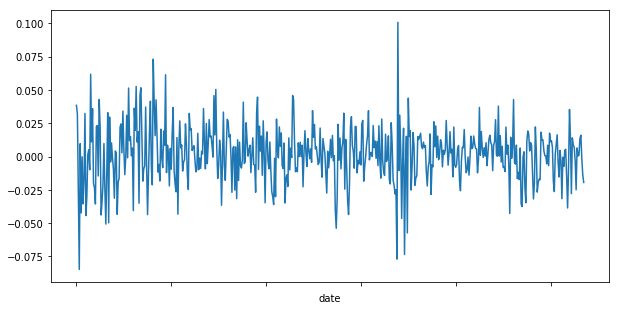

In [5]:
plt.figure(figsize=(10, 5))
df.ISE.plot.line()

In [6]:
df.columns

Index(['ISE', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')

In [7]:
n_train = 525

In [8]:
training = df.iloc[:n_train, :]
training.tail()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
1-Feb-11,0.035257,0.016556,0.014976,0.016057,0.003567,0.018926,0.015089,0.006224
2-Feb-11,0.014239,-0.002726,-0.000083,0.007075,0.017641,-0.017230,0.001618,0.003631
3-Feb-11,-0.027850,0.002351,0.001392,-0.002804,-0.002489,0.001154,-0.002883,0.000476
4-Feb-11,0.013959,0.002880,0.003127,0.002354,0.010695,-0.022662,0.002761,-0.003185
7-Feb-11,0.008553,0.006221,0.009298,0.008898,0.004591,0.001424,0.008217,-0.003346


In [9]:
testing = df.iloc[n_train:, :]
testing.head(10)

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
8-Feb-11,0.006886,0.004176,0.005425,0.006638,0.004140,0.006238,0.003980,-0.004499
9-Feb-11,-0.003255,-0.002790,-0.000320,-0.006423,-0.001708,-0.023895,-0.003024,-0.014249
10-Feb-11,-0.024921,0.000749,0.002644,-0.005351,-0.001148,0.005590,-0.003742,-0.014760
11-Feb-11,0.006418,0.005492,0.004204,0.007101,0.011241,0.018077,0.004727,0.003931
14-Feb-11,0.000405,0.002382,0.003444,-0.000462,0.000000,0.012123,0.000169,0.013448
15-Feb-11,0.000893,-0.003240,0.000461,-0.003803,0.001968,-0.003266,-0.000550,-0.001430
16-Feb-11,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
17-Feb-11,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
18-Feb-11,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938


In [10]:
X_train = training.iloc[:, 1:]
y_train = training.iloc[:, 0]

In [11]:
X_train.head()

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,
5-Jan-09,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
6-Jan-09,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
7-Jan-09,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
8-Jan-09,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
9-Jan-09,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [12]:
y_train

date
5-Jan-09     0.038376
6-Jan-09     0.031813
7-Jan-09    -0.026353
8-Jan-09    -0.084716
9-Jan-09     0.009658
12-Jan-09   -0.042361
13-Jan-09   -0.000272
14-Jan-09   -0.035552
15-Jan-09   -0.017268
16-Jan-09    0.032278
19-Jan-09   -0.044349
20-Jan-09   -0.029661
21-Jan-09    0.001529
22-Jan-09    0.005043
23-Jan-09   -0.010008
26-Jan-09    0.061708
27-Jan-09    0.010949
28-Jan-09    0.035871
29-Jan-09   -0.020272
30-Jan-09   -0.023458
2-Feb-09    -0.035607
3-Feb-09     0.022403
4-Feb-09     0.023231
5-Feb-09    -0.014571
6-Feb-09     0.042759
9-Feb-09     0.021468
10-Feb-09   -0.043907
11-Feb-09   -0.033893
12-Feb-09   -0.020825
13-Feb-09    0.009709
               ...   
28-Dec-10    0.000438
29-Dec-10   -0.005582
30-Dec-10    0.008438
31-Dec-10   -0.006861
3-Jan-11     0.017515
4-Jan-11     0.011048
5-Jan-11     0.011780
6-Jan-11     0.006850
7-Jan-11    -0.018755
10-Jan-11   -0.026325
11-Jan-11    0.001795
12-Jan-11    0.009064
13-Jan-11    0.016298
14-Jan-11   -0.004700
17-Ja

In [13]:
X_train = X_train.values

In [14]:
X_test = testing.iloc[:, 1:].values
y_test = testing.iloc[:, 0].values

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.intercept_, lr.coef_

(0.0005189276335197163,
 array([ 0.05259392, -0.20372715, -0.21201692,  0.03463676, -0.24650263,
         1.08078097,  1.01068037]))

In [16]:
lr.score(X_test, y_test)

0.5755202306210515

In [17]:
y_test_pred = lr.predict(X_test)

In [18]:
pd.DataFrame({"true": y_test, "predict": y_test_pred})

,true,predict
0,0.006886,-0.003414
1,-0.003255,-0.010039
2,-0.024921,-0.019226
3,0.006418,0.003461
4,0.000405,0.010826
5,0.000893,-0.000106
6,0.013400,0.005048
7,0.015977,0.000946
8,-0.001653,0.006450
9,-0.013706,-0.006892


Text(12.5,0.5,'Residual')

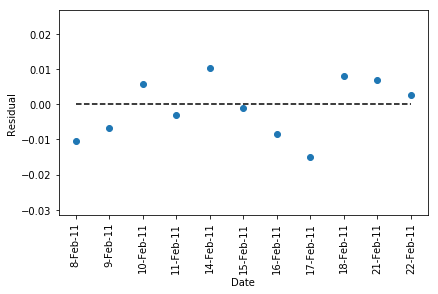

In [19]:
residuals = y_test_pred - y_test
plt.scatter(range(len(residuals)), residuals)
plt.xticks(range(len(residuals)), 
           df.iloc[n_train:, ].index, rotation = 90)
plt.tight_layout()
plt.hlines([0], xmin=0, xmax=10, linestyles = "--")
plt.xlabel("Date")
plt.ylabel("Residual")

In [20]:
residuals

array([-0.01029921, -0.00678394,  0.00569509, -0.00295712,  0.01042153,
       -0.00099877, -0.00835206, -0.01503077,  0.00810294,  0.00681362,
        0.00273589])

In [21]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [22]:
rmse(y_test, y_test_pred)

0.008079880693809762

In [23]:
df.columns

Index(['ISE', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')

In [24]:
df.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
5-Jan-09,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
6-Jan-09,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
7-Jan-09,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
8-Jan-09,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
9-Jan-09,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [27]:
# XGBoost on Stock Price dataset, Tune n_estimators and max_depth
model = XGBRegressor()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7]
print(max_depth)
print(training.iloc[1,1])
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBRegressor(n_estimators=n, max_depth=md)
        model.fit(X_train, y_train)
        y_pred1 = model.predict(X_test)
        score = model.score(X_test, y_test)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

[1, 2, 3, 4, 5, 6, 7]
0.0077867380000000005
Score is 0.475438139375002 at depth of 1 and estimator 150
Score is 0.5072879646506616 at depth of 2 and estimator 150
Score is 0.4688035858868439 at depth of 3 and estimator 150
Score is 0.48690832471583967 at depth of 4 and estimator 150
Score is 0.5330858478570444 at depth of 5 and estimator 150
Score is 0.5236809118114412 at depth of 6 and estimator 150
Score is 0.3452893310347086 at depth of 7 and estimator 150
Score is 0.4818345715365544 at depth of 1 and estimator 200
Score is 0.4793368124906522 at depth of 2 and estimator 200
Score is 0.43719109240491866 at depth of 3 and estimator 200
Score is 0.3669258352593431 at depth of 4 and estimator 200
Score is 0.45265454774305935 at depth of 5 and estimator 200
Score is 0.4760253649788132 at depth of 6 and estimator 200
Score is 0.3402464602263004 at depth of 7 and estimator 200
Score is 0.4911281966197174 at depth of 1 and estimator 250
Score is 0.46819110361379923 at depth of 2 and estimat

In [29]:
model = XGBRegressor(n_estimators=best_estimator, max_depth=best_depth)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

In [30]:
def rmse(y_true, y_pred1):
    return np.sqrt(np.mean((y_true - y_pred1) ** 2))
rmse(y_test, y_pred1)

0.008390778894546697

In [32]:
from sklearn.ensemble import RandomForestRegressor
#regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
sample_leaf_options = [1,5,10,50,100,200,500]
ms=0
for leaf_size in sample_leaf_options :
    model = RandomForestRegressor(n_estimators = 750, oob_score = True, n_jobs = -1,random_state =50, max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(X_train, y_train)
    predict=model.predict(X_test)
    sc=model.score(X_test,y_test)
    if(sc>ms):
        ms=sc
    print (sc)
print(ms)

0.48846031245348553
0.4817664835837936
0.5009731211942676
0.4122350809926558
-0.029593484580675344
-0.07088839092319721
-0.07088839092319721
0.5009731211942676


In [34]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
rmse(y_test, predict)

0.012833601656347582